In [172]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import *

#### Carga:

In [183]:
dados = pd.read_csv('datasets_T1/master.csv')

In [184]:
dados

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


#### Limpeza:

Excluímos a coluna 'country-year', pois as informações contidas nela também estão nas colunas 'country' e 'year' 

Corrigimos a coluna 'gdp_for_year($), que está como string, para um inteiro.

Escolhemos não excluir a coluna 'HDI for year', que tem muitas linhas não declaradas, porque queremos usar os dados das linhas que contém dados.

Substituímos os NaN da coluna HDI pela média de cada país

Criamos uma nova coluna para saber a classe de cada país naquele ano.

In [185]:
dados.drop('country-year', axis=1, inplace=True)

dados.columns = ['country', 'year', 'sex', 'age', 'suicides_number', 'population', 'suicides100k_pop', 'HDI_for_year', 'gdp_for_year($)', 'gdp_per_capita($)', 'generation']

dados['gdp_for_year($)'] = dados['gdp_for_year($)'].apply(lambda x: int(x.replace(',', '')))

dados.set_index('country', inplace=True)
for i in sorted(dados.index.unique()):
    dados.loc[i] = dados.loc[i].fillna(dados.loc[i]['HDI_for_year'].mean())
dados.reset_index(inplace=True)

def classes(x):
    if x <= 1026:
        return 'baixa'
    if x <= 3996:
        return 'media-baixa'
    if x <= 12375:
        return 'media-alta'
    if x > 12375:
        return 'alta'
    return 'unknown'
dados['class'] = dados['gdp_per_capita($)'].apply(lambda x: classes(x))

dados

,country,year,sex,age,suicides_number,population,suicides100k_pop,HDI_for_year,gdp_for_year($),gdp_per_capita($),generation,class
0,Albania,1987,male,15-24 years,21,312900,6.71,0.673,2156624900,796,Generation X,baixa
1,Albania,1987,male,35-54 years,16,308000,5.19,0.673,2156624900,796,Silent,baixa
2,Albania,1987,female,15-24 years,14,289700,4.83,0.673,2156624900,796,Generation X,baixa
3,Albania,1987,male,75+ years,1,21800,4.59,0.673,2156624900,796,G.I. Generation,baixa
4,Albania,1987,male,25-34 years,9,274300,3.28,0.673,2156624900,796,Boomers,baixa
5,Albania,1987,female,75+ years,1,35600,2.81,0.673,2156624900,796,G.I. Generation,baixa
6,Albania,1987,female,35-54 years,6,278800,2.15,0.673,2156624900,796,Silent,baixa
7,Albania,1987,female,25-34 years,4,257200,1.56,0.673,2156624900,796,Boomers,baixa
8,Albania,1987,male,55-74 years,1,137500,0.73,0.673,2156624900,796,G.I. Generation,baixa
9,Albania,1987,female,5-14 years,0,311000,0.00,0.673,2156624900,796,Generation X,baixa


#### Conhecendo o dataset:

In [6]:
dados.country.unique().size

101

Nosso dataset possui informações de 101 países, ou seja, de aproximadamente metade dos países. Por esse motivo, quando falarmos em "mundo", na realidade estaremos falando de aproximadamente metade dos países.

Colocamos um '0' no início da string '5-14 years' para que as strings de 'age' possam ficar em ordem crescente quando desejarmos. 

In [186]:
dados.loc[dados.age=='5-14 years', 'age'] = '05-14 years'

In [10]:
sorted(dados.age.unique())

['05-14 years',
 '15-24 years',
 '25-34 years',
 '35-54 years',
 '55-74 years',
 '75+ years']

Nosso dataset possui 5 faixas etárias.

In [11]:
sorted(dados.generation.unique())

['Boomers',
 'G.I. Generation',
 'Generation X',
 'Generation Z',
 'Millenials',
 'Silent']

Temos 6 gerações presentes no dataset:
    GI 1901-1924
    Silent 1925-1942
    Boomers 1943-1964
    X 1965-1979
    Millenials 1980-2000
    Z 2001-2013

In [157]:
dados

,country,year,sex,age,suicides_number,population,suicides_per_100k_pop,HDI_for_year,gdp_for_year($),gdp_per_capita($),generation,class
0,Albania,1987,male,15-24 years,21,312900,6.71,0.673,2156624900,796,Generation X,baixa
1,Albania,1987,male,35-54 years,16,308000,5.19,0.673,2156624900,796,Silent,baixa
2,Albania,1987,female,15-24 years,14,289700,4.83,0.673,2156624900,796,Generation X,baixa
3,Albania,1987,male,75+ years,1,21800,4.59,0.673,2156624900,796,G.I. Generation,baixa
4,Albania,1987,male,25-34 years,9,274300,3.28,0.673,2156624900,796,Boomers,baixa
5,Albania,1987,female,75+ years,1,35600,2.81,0.673,2156624900,796,G.I. Generation,baixa
6,Albania,1987,female,35-54 years,6,278800,2.15,0.673,2156624900,796,Silent,baixa
7,Albania,1987,female,25-34 years,4,257200,1.56,0.673,2156624900,796,Boomers,baixa
8,Albania,1987,male,55-74 years,1,137500,0.73,0.673,2156624900,796,G.I. Generation,baixa
9,Albania,1987,female,05-14 years,0,311000,0.00,0.673,2156624900,796,Generation X,baixa


#### Tratamento:

##### Em que ano ocorreram mais suicídios?

In [187]:
dados[['year', 'suicides_number']].groupby(['year']).sum().idxmax()

suicides_number    1999
dtype: int64

In [18]:
dados[['year', 'suicides_number']].groupby(['year']).sum().max()

suicides_number    256119
dtype: int64

O ano em em que ocorreram mais suicídios (256199) foi 1999.

In [24]:
df = dados[['country', 'year', 'suicides_number']]
df = df[df.year == 1999]
df.groupby(['country','year']).sum().idxmax()

suicides_number    (Russian Federation, 1999)
dtype: object

Também em 1999, o país em que mais ocorreram suicídios foi na Rússia. Por coincidência ou não, 1999 foi o ano em que se iniciou a Segunda Guerra na Chechênia.

##### Em que década houveram mais suicídios de pessoas do sexo masculino do que do sexo feminino? 

In [180]:
df_decade = pd.DataFrame([])
i = 1987
while(i <= 2016):
    df1 = dados[['year', 'sex', 'suicides_number']]
    df1 = df1[(df1.year >= i) & (df1.year < i+10)]
    df1 = df1[['sex', 'suicides_number']].groupby(['sex']).sum()
    df1.columns=[str(i)+'-'+str(i+10)]
    df1 = df1.T
    df_decade = pd.concat([df_decade, df1])
    i = i+10

df_decade

sex,female,male
1987-1997,472639,1482224
1997-2007,542707,1931003
2007-2017,477833,1605281


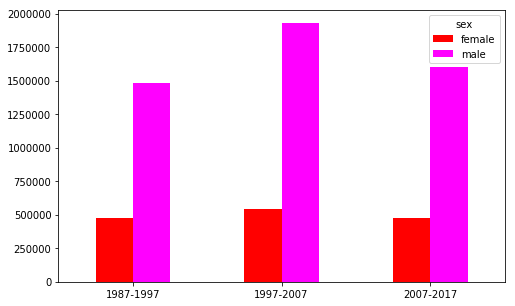

In [181]:
df_decade.plot.bar(rot=0, figsize = (8,5), color = ['red', 'magenta'])

Nas três décadas que compõem o dataset, as pessoas do sexo masculino cometeram mais suicídios do que as do sexo feminino.

##### Que país teve a maior taxa de suicídio na última década?

In [188]:
df2 = dados[['country', 'year', 'age', 'suicides100k_pop']]
df2 = df2[(df2.year >= 2006) & (df2.year <= 2016)]
df2[['country', 'suicides100k_pop']].groupby(['country']).mean().idxmax()

suicides100k_pop    Republic of Korea
dtype: object

O país com maior taxa de suicídio na última década foi a Coréia do Sul.

In [129]:
df2 = df2[df2.country == 'Republic of Korea']
df2 = df2.drop('year', axis=1)
df2 = df2.groupby(['age']).mean()
df2

,suicides100k_pop
age,
05-14 years,0.8365
15-24 years,11.9700
25-34 years,25.0405
35-54 years,30.6330
55-74 years,47.6965
75+ years,110.7410


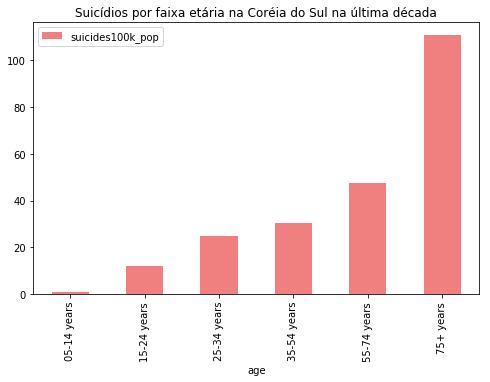

In [131]:
g1 = df2[['suicides100k_pop']].plot(figsize=(8,5), kind='bar', color = 'lightcoral', title = 'Suicídios por faixa etária na Coréia do Sul na última década')

O gráfico acima mostra que, na Coréia do Sul, a população idosa  é a que mais comete suicídio.
    * Aproximadamente metade dos idosos abaixo da linha de pobreza no país.
    * Pouco investimento em redes de segurança social para idosos.

##### Os 10 países com maior taxa de suicídios na última década:

In [189]:
df3 = dados[['country', 'year', 'age', 'suicides100k_pop', 'generation']]
df3 = df3[(df3.year >= 2006) & (df3.year <= 2016)]
df4 = df3[['country', 'age', 'suicides100k_pop', 'generation']].groupby(['country', 'age']).mean()
df4

suicides100k_pop
country              age                          
Albania              05-14 years          0.544000
                     15-24 years          2.608000
                     25-34 years          3.494000
                     35-54 years          3.428000
                     55-74 years          3.376000
                     75+ years            4.406000
Antigua and Barbuda  05-14 years          0.000000
                     15-24 years          0.000000
                     25-34 years          0.000000
                     35-54 years          0.498750
                     55-74 years          0.976250
                     75+ years            0.000000
Argentina            05-14 years          0.867500
                     15-24 years         12.239500
                     25-34 years          9.622500
                     35-54 years          7.811000
                     55-74 years          9.516000
                     75+ years           16.735000
Armenia              05-14 years          0.286500
                     15-24 years          1.388182
                     25-34 years          1.751818
                     35-54 years          2.905000
                     55-74 years          4.498182
                     75+ years            8.370455
Aruba                05-14 years          0.000000
                     15-24 years          2.536667
                     25-34 years         12.579167
                     35-54 years          9.834167
                     55-74 years         10.403333
                     75+ years            0.000000
...                                            ...
United Arab Emirates 05-14 years          0.063000
                     15-24 years          1.522000
                     25-34 years          1.781000
                     35-54 years          1.433000
                     55-74 years          2.139000
                     75+ years            0.946000
United Kingdom       05-14 years          0.139500
                     15-24 years          5.107000
                     25-34 years          8.641500
                     35-54 years         11.331000
                     55-74 years          7.702500
                     75+ years            7.206500
United States        05-14 years          0.720500
                     15-24 years         10.508500
                     25-34 years         14.115500
                     35-54 years         17.820500
                     55-74 years         16.532500
                     75+ years           20.376500
Uruguay              05-14 years          0.759444
                     15-24 years         15.763333
                     25-34 years         19.205556
                     35-54 years         20.032222
                     55-74 years         26.497778
                     75+ years           44.198889
Uzbekistan           05-14 years          1.498333
                     15-24 years          9.020833
                     25-34 years          8.141667
                     35-54 years          8.059167
                     55-74 years          5.599167
                     75+ years            3.742500

[575 rows x 1 columns]

In [190]:
nomes = []
for i in df4['suicides100k_pop'].index:
    nomes.extend([i[0]])
nomes = pd.Series(nomes).unique()

soma = []
for i in nomes:
    soma.extend([df4['suicides100k_pop'].loc[i].sum()])

df5 = pd.DataFrame(soma, index=nomes, columns=['TXgeral'])
df5

,TXgeral
Albania,17.856000
Antigua and Barbuda,1.475000
Argentina,56.791500
Armenia,19.200136
Aruba,35.353333
Australia,68.310500
Austria,104.188318
Azerbaijan,5.915000
Bahamas,9.036875
Bahrain,8.682778


In [191]:
df5 = df5.sort_values(by = 'TXgeral',  ascending = False)
df5.head(10)

,TXgeral
Republic of Korea,226.917500
Lithuania,202.148409
Suriname,184.321667
Guyana,181.294375
Sri Lanka,164.365000
Belarus,160.082857
Russian Federation,159.120500
Kazakhstan,156.237000
Hungary,146.332182
Slovenia,139.315500


##### Brasil 

In [14]:
df_brazil = dados[dados.country == 'Brazil']
df_brazil

,country,year,sex,age,suicides_number,population,suicides100k_pop,HDI_for_year,gdp_for_year($),gdp_per_capita($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,0.576,"222,942,790,435",1898,Generation X
4177,Brazil,1985,female,75+ years,32,988100,3.24,0.576,"222,942,790,435",1898,G.I. Generation
4178,Brazil,1985,female,55-74 years,148,5650100,2.62,0.576,"222,942,790,435",1898,G.I. Generation
4179,Brazil,1985,female,25-34 years,269,10798700,2.49,0.576,"222,942,790,435",1898,Boomers
4180,Brazil,1985,female,35-54 years,296,12185200,2.43,0.576,"222,942,790,435",1898,Silent
4181,Brazil,1985,female,15-24 years,280,13751800,2.04,0.576,"222,942,790,435",1898,Generation X


##### Em qual ano ocorreram mais suicídios no Brasil?

In [19]:
df6 = df_brazil[['year', 'suicides_number']].groupby(['year']).sum()
df6

,suicides_number
year,
1985,4228
1986,4271
1987,4672
1988,4466
1989,4463
1990,4803
1991,5156
1992,5207
1993,5508


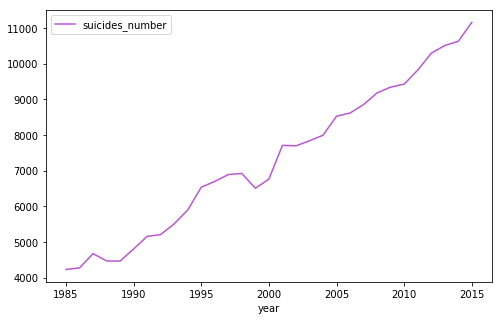

In [29]:
df6.plot(figsize=(8,5), color='mediumorchid')

O ano em que mais ocorreram suicídios no Brasil (até 2015) foi 2015.

##### Analisando as gerações no Brasil:

In [132]:
df8 = pd.pivot_table(df_brazil, index=['year'], columns=['generation'], values=['suicides_number'], aggfunc=np.sum)
df8.columns = ['Boomers', 'G.I. Generation', 'Generation X', 'Generation Z', 'Millenials', 'Silent']
df8

,Boomers,G.I. Generation,Generation X,Generation Z,Millenials,Silent
year,,,,,,
1985,1060.0,844.0,1017.0,NaN,NaN,1307.0
1986,1011.0,880.0,1078.0,NaN,NaN,1302.0
1987,1131.0,1021.0,1071.0,NaN,NaN,1449.0
1988,1115.0,899.0,1004.0,NaN,NaN,1448.0
1989,1138.0,894.0,1046.0,NaN,NaN,1385.0
1990,1195.0,986.0,1101.0,NaN,NaN,1521.0
1991,2933.0,191.0,1074.0,NaN,76.0,882.0
1992,3042.0,182.0,1099.0,NaN,75.0,809.0
1993,3164.0,201.0,1251.0,NaN,82.0,810.0


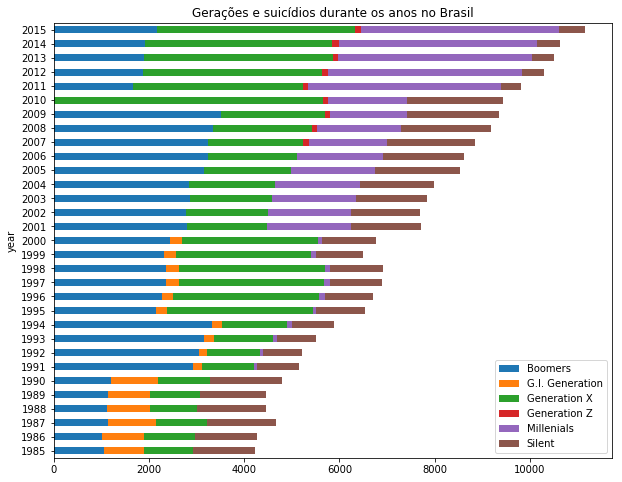

In [133]:
df8.plot.barh(figsize = (10,8), stacked=True, title='Gerações e suicídios durante os anos no Brasil')

##### Qual geração mais cometeu suicídio no Brasil?

In [67]:
df9 = df_brazil[['suicides_number', 'generation']].groupby(['generation']).sum()
df9 = df9.sort_values(by = 'suicides_number', ascending = False)
df9

,suicides_number
generation,
Generation X,70971
Boomers,70364
Millenials,38753
Silent,37641
G.I. Generation,7811
Generation Z,1073


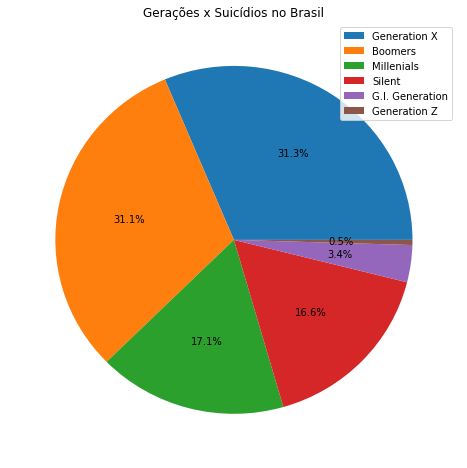

In [135]:
fig1, ax1 = subplots(figsize=(8, 8))
ax1.pie(df9.suicides_number, autopct='%0.1f%%')
ax1.legend(df9.index)
ax1.set_title('Gerações x Suicídios no Brasil')
show()

Os dados mostram que a geração X foi a que mais cometeu suicídio até hoje no Brasil.

##### Analisando as gerações por sexo:  quem comete mais suicídios no Brasil?

In [136]:
df10 = pd.pivot_table(df_brazil, index=['generation'], columns=['sex'], values=['suicides_number'], aggfunc=np.sum)
df10.columns=['female','male']
df10

,female,male
generation,,
Boomers,14846,55518
G.I. Generation,1698,6113
Generation X,15705,55266
Generation Z,456,617
Millenials,8740,30013
Silent,7570,30071


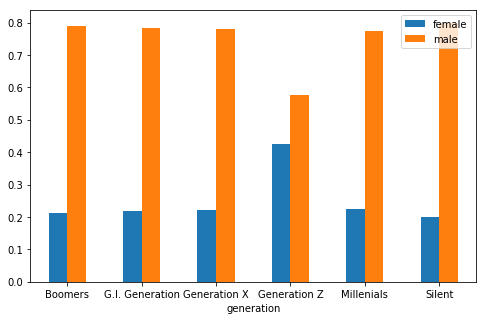

In [138]:
df10 = df10.div(df10.sum(1), axis=0)
df10.plot.bar(rot=0, figsize = (8,5))

##### Analisando as gerações: Qual a idade que mais pessoas se suicidam no Brasil?

In [139]:
df11 = pd.pivot_table(df_brazil, index=['generation'], columns=['age'], values=['suicides_number'], aggfunc=np.sum)
df11.columns=['05-14 years','15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
df11

,05-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
generation,,,,,,
Boomers,NaN,NaN,12124.0,48687.0,9553.0,NaN
G.I. Generation,NaN,NaN,NaN,NaN,4489.0,3322.0
Generation X,394.0,19297.0,28519.0,22761.0,NaN,NaN
Generation Z,1073.0,NaN,NaN,NaN,NaN,NaN
Millenials,1562.0,25300.0,11891.0,NaN,NaN,NaN
Silent,NaN,NaN,NaN,8412.0,23514.0,5715.0


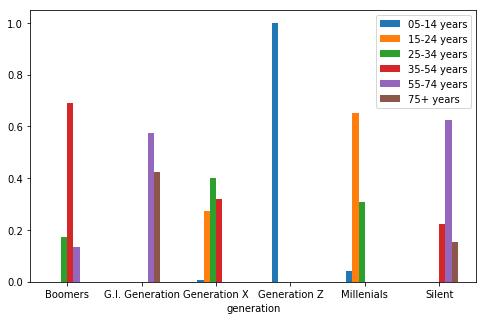

In [141]:
df11 = df11.div(df11.sum(1), axis=0)
df11.plot.bar(rot=0, figsize = (8,5))